In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits, ascii
import os
import numpy as np
#import requests
import pickle
from astropy.time import Time
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler

/home/nhao/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
!pip3 install pandas --upgrade

Requirement already up-to-date: pandas in ./anaconda3/lib/python3.8/site-packages (2.0.3)


In [3]:
# Load flux_3labels_JD data
fluxes = pd.read_csv("flux_3labels_JD")

fluxes

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,992,993,994,995,996,997,998,999,Labels,Labels_1
0,0,-77.226931,-17.455800,18.893241,15.820182,-9.982734,15.043798,4.179589,-17.948554,-2.606717,...,0.028272,-1.012767,0.186138,0.166001,1.284391,0.068284,0.371941,0.902037,no flare,no flare
1,1,-152.609354,-37.555708,-46.712326,11.335045,0.584405,8.266733,-0.834839,1.118031,2.682780,...,-0.200902,0.648628,-0.158028,-0.274293,1.317403,-1.911651,0.005103,-0.326359,no flare,no flare
2,2,-137.820947,-7.456546,-36.848851,2.369756,-3.514909,14.162960,4.620202,-1.609684,-0.721766,...,0.455582,1.034672,-0.596952,0.462513,-0.773176,-1.352247,0.587637,0.810433,no flare,no flare
3,3,-159.809543,-34.025970,-32.196320,1.168193,-1.194769,11.980240,3.178410,-2.911753,-0.323603,...,-0.970405,-0.920185,0.221509,0.093836,0.542105,-1.106048,0.877086,0.689458,no flare,no flare
4,4,-150.763019,-35.511307,-47.121941,10.237884,1.104875,7.392145,-0.367977,1.931578,3.407632,...,1.020580,0.191762,-0.744943,-0.993822,0.657094,-0.539081,-0.928584,-1.171663,no flare,no flare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28410,28410,66.250195,50.639520,81.550675,30.381838,2.992594,13.370503,6.323793,-6.035832,11.768254,...,-1.240908,0.479000,-1.048366,1.941936,-0.988622,-1.026125,0.372124,1.261229,no flare,no flare
28411,28411,-38.593233,14.109218,32.758031,1.911352,4.727023,3.886029,-1.979894,21.747084,6.563772,...,0.326658,1.685865,0.979851,1.316266,-0.418129,0.786073,-1.645505,-0.586321,no flare,no flare
28412,28412,-72.964957,-13.696635,18.159553,-1.407163,4.126969,3.115778,-11.960450,26.443290,6.974761,...,2.962566,0.880726,-0.709951,-0.070151,-0.623401,0.585996,-1.469852,-0.331505,strong flare end,strong flare
28413,28413,-37.213492,2.720945,28.399811,8.287974,2.157047,1.111266,-3.276166,23.269013,5.202598,...,0.618731,0.545907,0.446041,-0.480131,-0.120338,0.307843,-0.745497,-0.663347,no flare,no flare


In [4]:
Labels_1 = fluxes['Labels_1']

In [5]:
# split data
svm_X_train_3, svm_X_test_3, svm_y_train_3, svm_y_test_3 = train_test_split(fluxes.drop(['Labels','Labels_1'], axis=1), 
                                                    Labels_1, test_size=0.25)

In [6]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(svm_X_train_3, svm_y_train_3) # training step

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [7]:
clf_pred = clf.predict(svm_X_test_3)

In [8]:
# create confusion matrix
cm_3 = confusion_matrix(svm_y_test_3, clf_pred)
cm_3

array([[6673,    0,    0],
       [ 115,    0,    0],
       [ 316,    0,    0]])

In [9]:
# calculate aggregate accuracy score of the model
sklearn.metrics.accuracy_score(svm_y_test_3, clf_pred, normalize=True, sample_weight=None)

0.939329954954955

In [10]:
# accuracy score for each class (categorical accuracy)
cm = confusion_matrix(svm_y_test_3, clf_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("accuracy (no flare, weak flares, strong flares)")
print(cm.diagonal())

accuracy (no flare, weak flares, strong flares)
[1. 0. 0.]


In [ ]:
# we see that here only the no flare class is correctly classified

## Why is the model selecting only one class to classify? -> Imbalanced data

In [11]:
svm_y_test_3

1044     no flare
23362    no flare
2689     no flare
23084    no flare
6842     no flare
           ...   
14866    no flare
5159     no flare
17241    no flare
21283    no flare
9067     no flare
Name: Labels_1, Length: 7104, dtype: object

Text(0.5, 42.0, '')

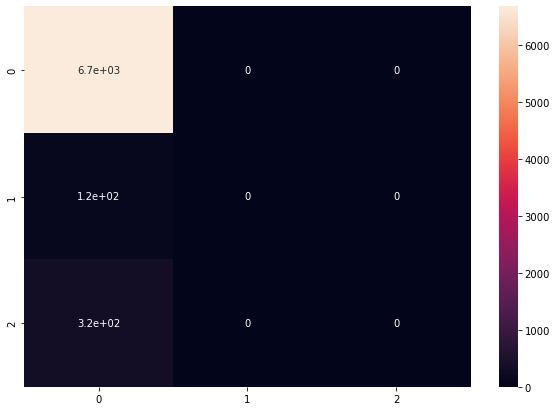

In [12]:
# plot confusion matrix
plt.figure(figsize=(10,7))


# reshape flights dataset in proper format to create seaborn heatmap
s= sns.heatmap(cm_3, annot=True)
s.set_xlabel('', fontsize = 10)

In [ ]:
list_accuracy_scores = []

for i in range(3):
    svm_X_train_3, svm_X_test_3, svm_y_train_3, svm_y_test_3 = train_test_split(fluxes.drop(['Labels','Labels_1'], axis=1), 
                                                    Labels_1, test_size=0.25)

    clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) # gamma = 'auto'?
    clf.fit(svm_X_train_3, svm_y_train_3)
    cm_3 = confusion_matrix(svm_y_test_3, clf_pred)
    # heat map
    cm = confusion_matrix(svm_y_test_3, clf_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("accuracy (no flare, weak flares, strong flares)")
    print(cm.diagonal())
    sklearn.metrics.accuracy_score(svm_y_test_3, clf_pred, normalize=True, sample_weight=None)
    list_accuracy_scores.append(sklearn.metrics.accuracy_score(svm_y_test_3, clf_pred, normalize=True, sample_weight=None))
    plt.figure(figsize=(10,7))
    sns.heatmap(cm_3, annot=True)

## Accuracy score for no flare, weak, and strong is [1,0,0] because the model is selecting only the no flare data to classify, why?

In [15]:
# check results (after converting time to JD)

fluxes['Labels_1'].value_counts()

no flare        26723
weak flare       1225
strong flare      467
Name: Labels_1, dtype: int64

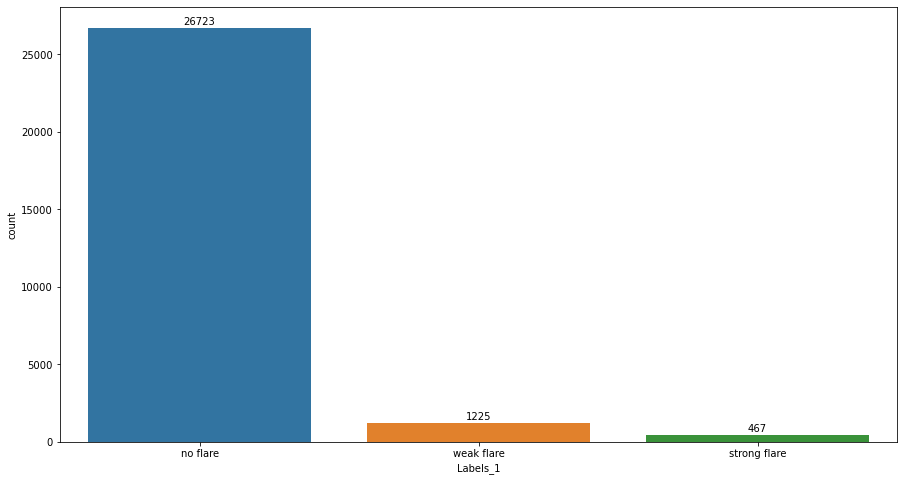

In [16]:
countplt, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x="Labels_1", data=fluxes, order = ('no flare', 'weak flare','strong flare'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

# There are 26723 no flare data points, 1225 weak flare, and 467 strong flare. It is clear that we have imbalanced data 

# We decided to use undersampling